In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
data = {
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9,
                        4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9,
                        8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445,
               57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088,
               81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582,
               116969, 112635, 122391]
}
df = pd.DataFrame(data)

In [5]:
X = df[['YearsExperience']]
y = df['Salary']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
x_manual = X_train.values.ravel()
y_manual = y_train

In [8]:
mean_x = np.mean(x_manual)
mean_y = np.mean(y_manual)

In [9]:
####  
###                ∑(xᵢ − x̄)(yᵢ − ȳ) 
###       m =    ────────────────────
###                  ∑(xᵢ − x̄)²

####             c = ȳ − m × x̄

In [10]:
numerator = np.sum((x_manual - mean_x) * (y_manual - mean_y))
denominator = np.sum((x_manual - mean_x)**2)
m = numerator / denominator
c = mean_y - m * mean_x

In [11]:
x_test_manual = X_test.values.ravel()
y_pred_manual = m * x_test_manual + c

In [12]:
r2_manual = r2_score(y_test, y_pred_manual)
mse_manual = mean_squared_error(y_test, y_pred_manual)

In [13]:
print(r2_manual , " " , mse_manual)

0.9097342191149167   44089615.95081589


In [14]:
##from sklearn

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

In [16]:
r2_sklearn = r2_score(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

In [31]:
print(r2_sklearn," " , mse_sklearn)

0.9097342191149166   44089615.95081597


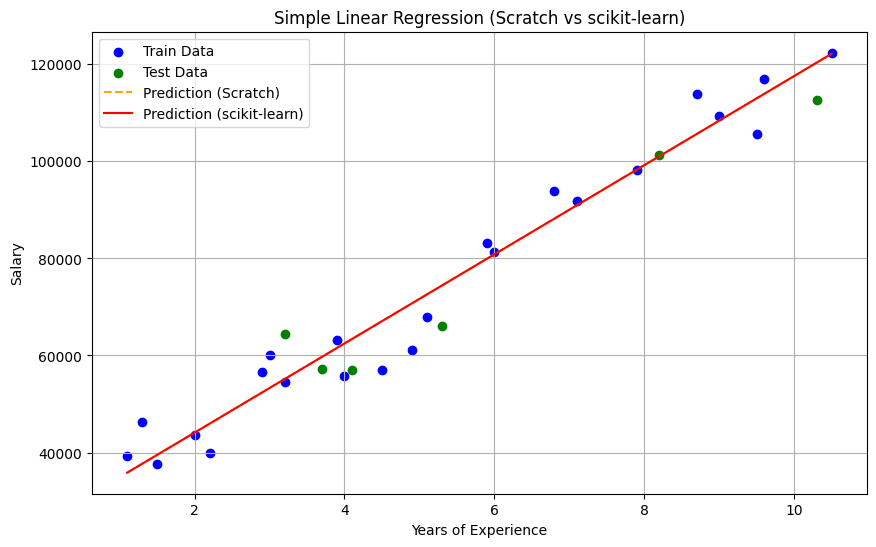

In [33]:
plt.figure(figsize=(10, 6))

# Plot Train data
plt.scatter(X_train, y_train, color='blue', label='Train Data')

# Plot Test data
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Prediction lines
x_line = np.linspace(X['YearsExperience'].min(), X['YearsExperience'].max(), 100).reshape(-1, 1)
x_line_df = pd.DataFrame(x_line, columns=['YearsExperience'])  # <- Match feature name

y_line_sklearn = model.predict(x_line_df)
y_line_manual = m * x_line + c

plt.plot(x_line, y_line_manual, color='orange', linestyle='--', label='Prediction (Scratch)')
plt.plot(x_line, y_line_sklearn, color='red', linestyle='-', label='Prediction (scikit-learn)')

plt.title("Simple Linear Regression (Scratch vs scikit-learn)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()


In [36]:
print("📊 Model Evaluation\n")
print("From Scratch:")
print(f"  Slope (m): {m:.2f}")
print(f"  Intercept (c): {c:.2f}")
print(f"  R² Score: {r2_manual:.4f}")
print(f"  Mean Squared Error: {mse_manual:.2f}")

print("\nUsing Scikit-Learn:")
print(f"  Slope (m): {model.coef_[0]:.2f}")
print(f"  Intercept (c): {model.intercept_:.2f}")
print(f"  R² Score: {r2_sklearn:.4f}")
print(f"  Mean Squared Error: {mse_sklearn:.2f}")

📊 Model Evaluation

From Scratch:
  Slope (m): 9185.53
  Intercept (c): 25734.17
  R² Score: 0.9097
  Mean Squared Error: 44089615.95

Using Scikit-Learn:
  Slope (m): 9185.53
  Intercept (c): 25734.17
  R² Score: 0.9097
  Mean Squared Error: 44089615.95
